In [155]:
city = "Carlsbad"
state = "California"
country = "USA"

In [156]:
import osmnx as ox
import os
%matplotlib inline

#Get users Desktop path and create a variable to store it. This is where all files will be saved (images and JSON coordinate lists)
desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
dirname = r"\osmnxOutputFiles"
SAVE_LOCATION = desktop+dirname

#If directory ~/Desktop/osmnxOutputFiles does not exist, create it, otherwise continue
if not os.path.isdir(SAVE_LOCATION):
    os.mkdir(SAVE_LOCATION)
dirname = r"\\"
SAVE_LOCATION = SAVE_LOCATION + dirname

ox.config(log_console=True, use_cache=True,imgs_folder=SAVE_LOCATION, cache_folder=SAVE_LOCATION)
ox.__version__

'0.15.1'

TypeError occured


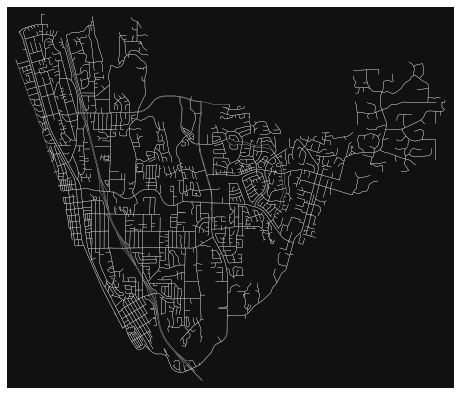

In [157]:
import json
from IPython.display import Image
from collections import defaultdict

street_widths = {'footway' : 0.5,
                 'steps' : 0.5,
                 'pedestrian' : 0.5,
                 'path' : 0.5,
                 'track' : 0.5,
                 'service' : .5,
                 'residential' : .5,
                 'primary' : .5,
                 'highway' : .7,
                 'motorway' : .5}


#Place_name must be in format of 'City, State, Country'
#Each query produces a text file of streets and coordinates for each street
#plus a .png file representing the network of the streets.
#Default location set to Carlsbad, California, USA
place_name = 'Carlsbad, California, USA'
place_name = {'city':city, 'state':state, 'country':country}

try:
    G = ox.graph_from_place(place_name, network_type='drive')
except TypeError:
    print("TypeError occured")
    G = ox.graph_from_place(place_name, network_type='drive', which_result = 2)

place_name = {'city':city, 'state':state,'country':country}


place = city + "_" + state + "_" + country + "_Map.png"

SAVE_PLACE = SAVE_LOCATION+place
streetDict = defaultdict(list)

nodes,edges = ox.graph_to_gdfs(G)
a = ""

#Iterate over the graph creating a dictionary of lists
#Dictionary consists of a street name: and multiple lists of coordinates
#KeyErrors are thrown (not sure about why) but we skip them by assigning nothing to a dummy variable
for u,v,key,data in G.edges(keys=True, data=True):
    try:
        #print(data['name'],data['geometry'])
        #routeNames.append(data['name'])
        #routeCoords.append(data['geometry'].coords)
        streetDict[str(data['name'])].append(list(data['geometry'].coords))
    except KeyError:
        a += ""

fig, ax = ox.plot_graph(G,save=True,show=False, filepath = SAVE_PLACE, node_size=0, edge_color='#FFFFFF', edge_linewidth=0.25, dpi=500)



In [158]:
#Process streetDict and export to file as JSON.
JSON_street_dict = {}
temp_coords_list = []
#Filename for the JSON file created from streetDict
jsonFileName = city + "_" + state + "_" + country + "_StreetCoords.json"

#As long as streetDict has more than 10 entries, for the street name and list of coordinates not equal to 0 (not empty)
#for each list of coordinates per street take the coordinate pairs and swap them (Currenty: long/lat but changed to lat/long since this is Google's format)
#append all lists of coordinates for that street to a temporary coordinate list [temp_coords_list].
#Once all lists for that street have been processed, update the JSON_street_dict, clear the temporary list and process the next street.
#When all streets have finished processing: dump the file to the SAVE_LOCATION [~/Desktop/osmnxOutputFiles] as a JSON file.
if len(streetDict) > 10:
    for name, coords in streetDict.items():
        if len(coords) == 0:
            continue
        else:
            for coordinateLists in coords:
                for coordinatePairs in coordinateLists:
                    tmpCoords = str(coordinatePairs[1]) + " " + str(coordinatePairs[0])
                    temp_coords_list.append(tmpCoords)
                #print(temp_coords_list)
                JSON_street_dict.update({name:temp_coords_list.copy()})
            temp_coords_list.clear()
    with open(SAVE_LOCATION+jsonFileName, 'w') as json_file:
        json.dump(JSON_street_dict, json_file, indent = 4)
